# Plot Power Function of UMPU Test and UMP Test

Both tests are taken as Wald test applied for the population $N(\mu,\sigma^2)$ with $\sigma$ known and the test to be $H_0:\mu=\mu_0,H_1:\mu\neq\mu_0$. Take level $\alpha=0.05,\mu_0 = 0$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm
from scipy.stats import chi2
from scipy.optimize import fsolve

# Parameters
global alpha
alpha = 0.05
mu_0 = 0
global n
n = 10
sigma = 1

In [2]:
# beta_Wald power function as a function of mu
def beta_wald(alpha,mu_0,n,sigma,mu):
    coeff = sigma / np.sqrt(n)
    return norm.cdf(((mu_0 - mu) + coeff * norm.ppf(alpha / 2)) / coeff) + norm.cdf(((mu - mu_0) + coeff * norm.ppf(alpha / 2)) / coeff)

In [3]:
# beta_one_sided power function as a function of mu
def beta_one_sided(alpha,mu_0,n,sigma,mu):
    coeff = sigma / np.sqrt(n)
    return norm.cdf(norm.ppf(alpha) - (mu_0 - mu) / coeff)

Text(0.5, 0, 'mu value')

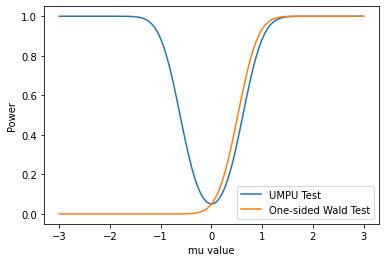

In [4]:
# Plot power fuctions
mu_plot = np.linspace(-3,3,100)
plt.plot(mu_plot,beta_wald(alpha,mu_0,n,sigma,mu_plot))
plt.plot(mu_plot,beta_one_sided(alpha,mu_0,n,sigma,mu_plot))
plt.legend(['UMPU Test','One-sided Wald Test'])
plt.ylabel('Power')
plt.xlabel('mu value')

## Consider the Two-sided Test for Testing Population Variance of Gaussian Population with Known Population Mean

In [5]:
# Parameters
global alpha
alpha = 0.2
global n
n = 5
sigma_0 = 1
mu = 0

In [6]:
# Power function for the one-sided UMP test
def beta_one_sided_UMP_sigma(n,sigma_0,alpha,mu,sigma):
    ratio = sigma_0 ** 2 / sigma ** 2
    return chi2.cdf(ratio * chi2.ppf(alpha, df = n),df = n)

In [7]:
# Power function for the equal-tailed two-sided test
def beta_equal_tailed_sigma(n,sigma_0,alpha,mu,sigma):
    ratio = sigma_0 ** 2 / sigma ** 2
    return 1 - chi2.cdf(ratio * chi2.ppf(1 - alpha/2, df = n),df = n) \
            + chi2.cdf(ratio * chi2.ppf(alpha/2, df = n),df = n)

In [8]:
# Equation for d1,d2
def func(x):
    return [chi2.cdf(x[1],df = n) - chi2.cdf(x[0],df = n) + alpha - 1,
            chi2.cdf(x[1],df = n + 2) - chi2.cdf(x[0],df = n + 2) + alpha - 1]
root = fsolve(func, (1.89,10.42))
# Check the root and its erro
print(root)
print(chi2.cdf(root[1],df = n) - chi2.cdf(root[0],df = n) + alpha - 1)
print(chi2.cdf(root[1],df = n + 2) - chi2.cdf(root[0],df = n + 2) + alpha - 1)

[ 1.8911523  10.42741048]
-7.993605777301127e-15
-8.215650382226158e-15


In [9]:
# Power function for the two-sided UMPU test
def beta_two_sided_UMPU_sigma(n,sigma_0,alpha,mu,sigma):
    # First derive d1,d2
    # This fsolve is not robust and depends on the initial point!!!
    root = fsolve(func, (1.89,10.42))
    d1 = np.maximum(root[0],0)
    d2 = np.maximum(root[1],0)
    ratio = sigma_0 ** 2 / sigma ** 2
    return 1 - chi2.cdf(ratio * d2,df = n) + chi2.cdf(ratio * d1,df = n)

Text(0.5, 0, 'sigma value')

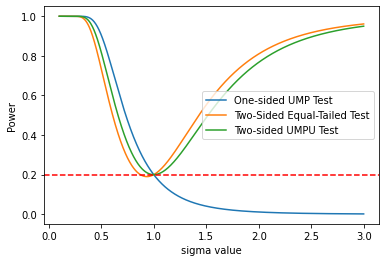

In [10]:
# Plot
sigma_plot = np.linspace(0.1,3,1000)
plt.plot(sigma_plot,beta_one_sided_UMP_sigma(n,sigma_0,alpha,mu,sigma_plot))
plt.plot(sigma_plot,beta_equal_tailed_sigma(n,sigma_0,alpha,mu,sigma_plot))
plt.plot(sigma_plot,beta_two_sided_UMPU_sigma(n,sigma_0,alpha,mu,sigma_plot))
plt.axhline(alpha, color='r', linestyle='dashed')
plt.legend(['One-sided UMP Test','Two-Sided Equal-Tailed Test','Two-sided UMPU Test'])
plt.ylabel('Power')
plt.xlabel('sigma value')